import necessary libraries that required

In [5]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

upload and read the csv file

In [6]:
data = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [7]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


processing and cleaning of dataprocessing and cleaning of data

In [8]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.duplicated().sum()

0

visualizing the data

Text(0, 0.5, 'Spending_Score')

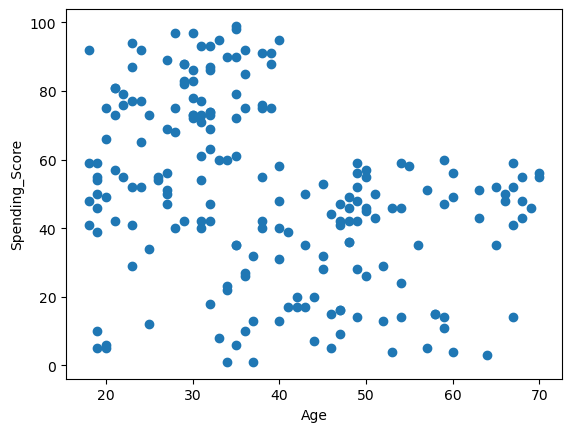

In [10]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending_Score')

Text(0, 0.5, 'Annual Income (k$)')

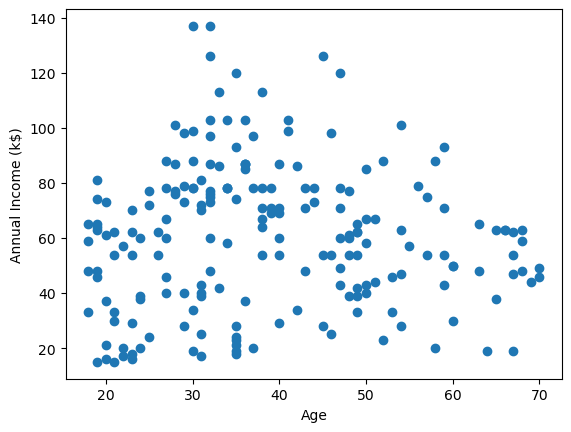

In [11]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

make relevant dataset for clustering operation

In [12]:
relevant_columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
data = data[relevant_columns]

In [13]:
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


scaling the dataset to make it in a proper standard

In [14]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
s_data=stsc.fit(data)
s_data = stsc.transform(data)

In [15]:
s_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

make a function for find best number for clustering

In [16]:
def find_best_clusters(df,maximum_k):
  cluster_centers=[]
  k_values=[]
  for k in range(1,maximum_k):
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(df)
    cluster_centers.append(kmean_model.inertia_)
    k_values.append(k)
  return cluster_centers,k_values

In [17]:
clusters_centers, k_values = find_best_clusters(s_data,10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

create a function to display a elbow plot by k_values and cluster_points

In [18]:
def generate_elbow_plot(cluster_centers,k_values):
  figure = plt.subplots(figsize=(12,6))
  plt.plot(k_values,cluster_centers,'o-',color='orange')
  plt.xlabel('number of clusters')
  plt.ylabel('cluster inertia')
  plt.title('elbow point of kmeans')
  plt.show()

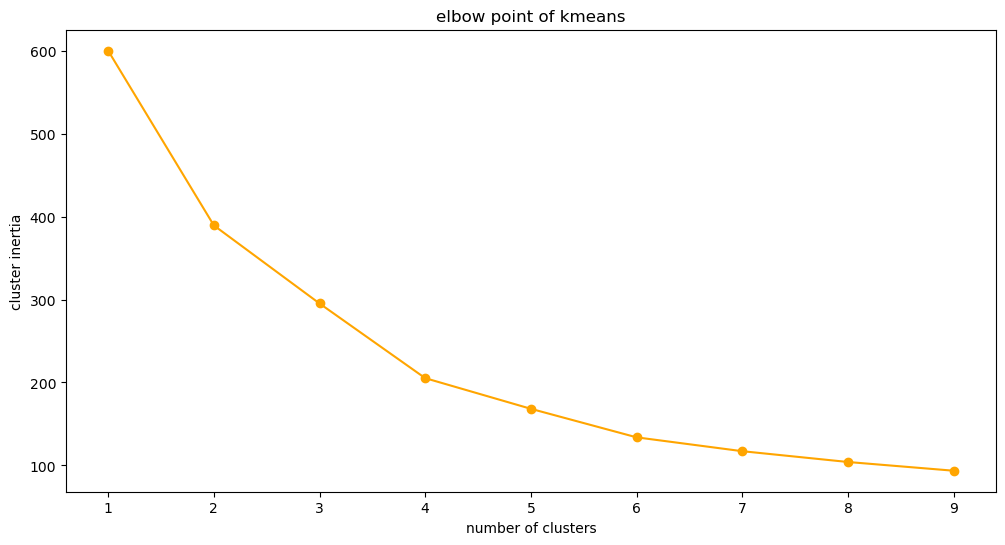

In [19]:
generate_elbow_plot(clusters_centers, k_values)

as u clearly see that the graph is divert from 5th point which means 5 clusters are appropriate for our dataset

In [20]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(s_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
data['clusters'] = kmeans_model.labels_
data

/tmp/ipykernel_32/367913687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = kmeans_model.labels_


,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


visualizing the dataset based on above processing

Text(0, 0.5, 'Annual Income (k$)')

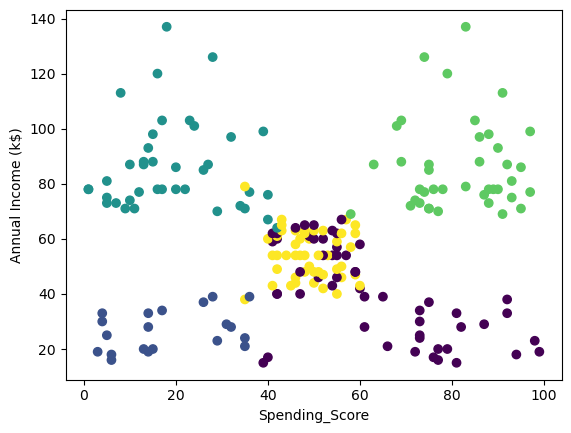

In [22]:
plt.scatter(data["Spending Score (1-100)"],
            data["Annual Income (k$)"],
            c = data["clusters"])
plt.xlabel('Spending_Score')
plt.ylabel('Annual Income (k$)')

As in that u can clearly see that there are 5 clusters and each cluster represent something as dark blue cluster represent that these people have high income but less spend which means we have to target that type of customers and haivng purple cluster represent that these have high income and spend more which is digestive and sensible thing